In [101]:
import pandas as pd
import glob
from natsort import natsorted
from tqdm import tqdm
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

# read fc time course:
# input_dir = "data_fmri_time_course2/"
input_dir = "data_fmri_time_course_conn/"
input_dir2 = "data_fmri_time_course2/"

files_seed = natsorted(glob.glob(input_dir + "time_course_NTHC*.txt") + 
                       glob.glob(input_dir2 + "time_course_NTS*.txt"))
files_target = natsorted(glob.glob(input_dir + "time_course_target_NTHC*.txt") +
                         glob.glob(input_dir2 + "time_course_target_NTS*.txt"))

df_connectivity = pd.DataFrame({
    'files_seed': files_seed,
    'files_target': files_target,
    'subject_id': [int(x[-8:-4]) for x in files_seed],
    'group': [re.findall("NTHC|NTS", x)[0] for x in files_seed],
})


df1 = pd.read_csv(files_seed[0], sep = '\t')
df1.pop(df1.columns[-1])
seed_list = list(df1.columns)
seed_list = ['_'.join(x.split('_')[1:]) for x in seed_list]
print(seed_list)

df2 = pd.read_csv(files_target[0], sep = '\t')
df2.pop(df2.columns[-1])
target_list = list(df2.columns)
target_list = ['_'.join(x.split('_')[1:-1]) for x in target_list]
print(target_list)

# calculate pearson correlation between seed and target regions:
for seed in df1:
    for target in df2:
        col_label = '_'.join(seed.split('_')[1:]) + '-' + '_'.join(target.split('_')[1:-1])
        df_connectivity[col_label] = np.nan
    
# select subjects identifed in script01_organize_subject_info:
df_life_time_mdd = pd.read_csv('out02_img_file_info_mdd_tms_response.csv')

# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response.csv')
# df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
df_nthc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore_gm.3.csv')

subject_selected = list(df_nthc['subject_id'].unique()) + list(df_life_time_mdd['subject_id'])
df_connectivity  = df_connectivity.loc[df_connectivity['subject_id'].isin(subject_selected), :]
# df_connectivity


['L_aMFG_10-6mm', 'L_aMFG_10mm', 'L_aMFG_14-10mm', 'L_aMFG_14mm', 'L_aMFG_6mm', 'L_pMFG_10-6mm', 'L_pMFG_10mm', 'L_pMFG_14-10mm', 'L_pMFG_14mm', 'L_pMFG_6mm', 'R_aMFG_10-6mm', 'R_aMFG_10mm', 'R_aMFG_14-10mm', 'R_aMFG_14mm', 'R_aMFG_6mm', 'R_FEF_10-6mm', 'R_FEF_10mm', 'R_FEF_14-10mm', 'R_FEF_14mm', 'R_FEF_6mm', 'R_IFJ_10-6mm', 'R_IFJ_10mm', 'R_IFJ_14-10mm', 'R_IFJ_14mm', 'R_IFJ_6mm', 'R_IPL_10-6mm', 'R_IPL_10mm', 'R_IPL_14-10mm', 'R_IPL_14mm', 'R_IPL_6mm', 'R_M1_10-6mm', 'R_M1_10mm', 'R_M1_14-10mm', 'R_M1_14mm', 'R_M1_6mm', 'R_pMFG_10-6mm', 'R_pMFG_10mm', 'R_pMFG_14-10mm', 'R_pMFG_14mm', 'R_pMFG_6mm', 'R_preSMA_10-6mm', 'R_preSMA_10mm', 'R_preSMA_14-10mm', 'R_preSMA_14mm', 'R_preSMA_6mm']
['FIRST_B_amyg', 'FIRST_L_amyg', 'FIRST_R_amyg', 'FSL_B_Amy', 'FSL_L_Amy', 'FSL_R_Amy', 'ROI_B_Amy_Com', 'ROI_L_Amy_Com', 'ROI_R_Amy_Com', 'sgACC_6_16_-10']


In [102]:
df_connectivity.head()

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm-FIRST_B_amyg,L_aMFG_10-6mm-FIRST_L_amyg,L_aMFG_10-6mm-FIRST_R_amyg,L_aMFG_10-6mm-FSL_B_Amy,L_aMFG_10-6mm-FSL_L_Amy,L_aMFG_10-6mm-FSL_R_Amy,...,R_preSMA_6mm-FIRST_B_amyg,R_preSMA_6mm-FIRST_L_amyg,R_preSMA_6mm-FIRST_R_amyg,R_preSMA_6mm-FSL_B_Amy,R_preSMA_6mm-FSL_L_Amy,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10
1,data_fmri_time_course2/time_course_NTS3006.txt,data_fmri_time_course2/time_course_target_NTS3...,3006,NTS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,data_fmri_time_course2/time_course_NTS3045.txt,data_fmri_time_course2/time_course_target_NTS3...,3045,NTS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,data_fmri_time_course2/time_course_NTS3053.txt,data_fmri_time_course2/time_course_target_NTS3...,3053,NTS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,data_fmri_time_course2/time_course_NTS3074.txt,data_fmri_time_course2/time_course_target_NTS3...,3074,NTS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,data_fmri_time_course2/time_course_NTS3086.txt,data_fmri_time_course2/time_course_target_NTS3...,3086,NTS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
    
for i in tqdm(range(len(df_connectivity.index))):
    df1 = pd.read_csv(df_connectivity.iloc[i, 0], sep = '\t')
    df1.pop(df1.columns[-1])
    df2 = pd.read_csv(df_connectivity.iloc[i, 1], sep = '\t')
    df2.pop(df2.columns[-1])
    corr = []
    for seed in df1:
        for target in df2:
            corr.append(np.corrcoef(df1[seed].values, df2[target].values)[0][1])
        
    df_connectivity.iloc[i, 4:] = corr

df_connectivity.to_csv('out03_functional_connectivity.csv', index = None)

100%|███████████████████████████████████████████| 52/52 [00:03<00:00, 14.17it/s]


In [4]:
df_connectivity.head()

,files_seed,files_target,subject_id,group,L_aMFG_10-6mm-FIRST_B_amyg,L_aMFG_10-6mm-FIRST_L_amyg,L_aMFG_10-6mm-FIRST_R_amyg,L_aMFG_10-6mm-FSL_B_Amy,L_aMFG_10-6mm-FSL_L_Amy,L_aMFG_10-6mm-FSL_R_Amy,...,R_preSMA_6mm-FIRST_B_amyg,R_preSMA_6mm-FIRST_L_amyg,R_preSMA_6mm-FIRST_R_amyg,R_preSMA_6mm-FSL_B_Amy,R_preSMA_6mm-FSL_L_Amy,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10
1,data_fmri_time_course2/time_course_NTS3006.txt,data_fmri_time_course2/time_course_target_NTS3...,3006,NTS,0.443327,0.328516,0.418998,0.448152,0.333239,0.432473,...,0.003461,0.159394,-0.105448,0.030396,0.193113,-0.097766,0.021573,0.106469,-0.062757,0.419125
18,data_fmri_time_course2/time_course_NTS3045.txt,data_fmri_time_course2/time_course_target_NTS3...,3045,NTS,0.527081,0.564584,0.443537,0.540024,0.592707,0.432895,...,0.215637,0.227713,0.184329,0.275649,0.274292,0.245814,0.221117,0.227096,0.185847,0.232927
22,data_fmri_time_course2/time_course_NTS3053.txt,data_fmri_time_course2/time_course_target_NTS3...,3053,NTS,-0.208135,-0.242667,-0.147835,-0.165398,-0.223758,-0.099064,...,-0.194787,-0.262136,-0.114243,-0.155795,-0.241493,-0.072644,-0.184526,-0.241183,-0.117569,-0.190959
28,data_fmri_time_course2/time_course_NTS3074.txt,data_fmri_time_course2/time_course_target_NTS3...,3074,NTS,0.718521,0.803288,0.441257,0.730634,0.810911,0.465821,...,0.815658,0.926267,0.485225,0.828953,0.932369,0.515270,0.798149,0.894376,0.430252,-0.889821
33,data_fmri_time_course2/time_course_NTS3086.txt,data_fmri_time_course2/time_course_target_NTS3...,3086,NTS,0.244530,0.209037,0.243167,0.227110,0.185644,0.234655,...,0.282294,0.284432,0.247074,0.314616,0.310163,0.283473,0.228916,0.250653,0.172377,0.212332


In [104]:
# fisher z transform FC (pearson's correlation)

# import re
import pandas as pd

df_connectivity = pd.read_csv('out03_functional_connectivity.csv')

def fisher_z(r):
    return .5*(np.log(1+r) - np.log(1-r))

fc_cols = [x for x in df_connectivity.columns if re.search('-', x)]
for col in fc_cols:
    df_connectivity[col] = fisher_z(df_connectivity[col].values)
    

df_connectivity.drop(columns = ['files_seed', 'files_target'], inplace = True)
df_connectivity.to_csv('out03_functional_connectivity_z.csv', index = None)
df_connectivity.describe()


,subject_id,L_aMFG_10-6mm-FIRST_B_amyg,L_aMFG_10-6mm-FIRST_L_amyg,L_aMFG_10-6mm-FIRST_R_amyg,L_aMFG_10-6mm-FSL_B_Amy,L_aMFG_10-6mm-FSL_L_Amy,L_aMFG_10-6mm-FSL_R_Amy,L_aMFG_10-6mm-ROI_B_Amy_Com,L_aMFG_10-6mm-ROI_L_Amy_Com,L_aMFG_10-6mm-ROI_R_Amy_Com,...,R_preSMA_6mm-FIRST_B_amyg,R_preSMA_6mm-FIRST_L_amyg,R_preSMA_6mm-FIRST_R_amyg,R_preSMA_6mm-FSL_B_Amy,R_preSMA_6mm-FSL_L_Amy,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1322.519231,-0.019983,-0.003793,-0.030160,-0.006335,0.007772,-0.017060,-0.008016,0.002457,-0.019775,...,0.056144,0.077722,0.026995,0.081242,0.095350,0.056143,0.053928,0.071499,0.017684,-0.086333
std,695.650112,0.293742,0.313181,0.235132,0.295823,0.319081,0.234841,0.306989,0.314361,0.255259,...,0.234870,0.301906,0.173220,0.233703,0.304154,0.169429,0.242301,0.289557,0.165766,0.284754
min,1001.000000,-1.048113,-1.258165,-0.638144,-1.044136,-1.275539,-0.602624,-1.233409,-1.376205,-0.811626,...,-0.429828,-0.471413,-0.365382,-0.354574,-0.456954,-0.262751,-0.466127,-0.510293,-0.397812,-1.421063
25%,1028.750000,-0.176313,-0.136561,-0.176762,-0.167066,-0.150605,-0.167200,-0.165765,-0.137089,-0.143427,...,-0.028453,-0.067267,-0.084679,-0.006780,-0.048387,-0.035967,-0.076720,-0.074095,-0.079937,-0.193535
50%,1054.000000,-0.054779,-0.032642,-0.041194,-0.037602,-0.006685,-0.038615,-0.020088,0.009555,-0.058406,...,0.042802,0.053068,0.023232,0.067112,0.074441,0.055208,0.046062,0.058306,0.010542,-0.113783
75%,1098.250000,0.115536,0.120794,0.085548,0.136968,0.139510,0.100642,0.104559,0.131337,0.106882,...,0.171845,0.170368,0.132089,0.175550,0.194542,0.149454,0.171417,0.193560,0.127565,0.082226
max,3116.000000,0.904581,1.107813,0.476626,0.930087,1.129683,0.504720,0.850458,0.993199,0.552729,...,1.143706,1.631441,0.529795,1.184781,1.676216,0.569878,1.093491,1.443382,0.460206,0.580246


In [6]:
# ttest:
df_connectivity = pd.read_csv('out03_functional_connectivity_z.csv')
# df_connectivity_long = pd.wide_to_long(df_connectivity, target_list, i="id", j="year")

from scipy.stats import ttest_ind
import numpy as np

def format_table(report):
    report2 = report.copy()
    report2[report.gt(0)] = report2[report.gt(0)].astype(str).apply(lambda x : x.str[:5])
    report2[report.lt(0)] = report2[report.lt(0)].astype(str).apply(lambda x : x.str[:6])
    
    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.05)] = \
    report_pvalue[report.iloc[1::3,:].le(0.05)].apply(lambda x : x.str[:5]).add('*')

    report_pvalue = report2.iloc[1::3,:]
    report_pvalue[report.iloc[1::3,:].le(0.01)] = \
    report_pvalue[report.iloc[1::3,:].le(0.01)].apply(lambda x : x.str[:5]).add('**')
        
    return report2

# seed_list = ['sgACC_6_16_-10', 'FIRST_B_amyg_small', 'FIRST_L_amyg_small', 'FIRST_R_amyg_small']
seed_list = ['sgACC_6_16_-10', 'FIRST_B_amyg', 'FIRST_L_amyg', 'FIRST_R_amyg']
mask = '_10mm-'

test_variables = []
for seed in seed_list:
    test_variables += [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]

row_index = pd.MultiIndex.from_tuples([(i , j) for i in seed_list for j in ['t value', 'p value', "Cohen's d"]])

result = pd.DataFrame(index = row_index, 
                      columns = list(set([x.split('-')[0] for x in test_variables])))

# statistical tests for each roi and roi setting:
for var in test_variables:
        
    seed = '-'.join(var.split('-')[1:])
    target = var.split('-')[0]
    hc = df_connectivity.loc[(df_connectivity['group']=='NTHC') & (~df_connectivity[var].isna()), var]
    mdd = df_connectivity.loc[(df_connectivity['group']=='NTS') & (~df_connectivity[var].isna()), var]
    t, p = ttest_ind(hc, mdd)

    cohend = (np.mean(hc) - np.mean(mdd)) / (np.sqrt((np.std(hc) ** 2 + np.std(mdd) ** 2) / 2))

    result.loc[(seed, 't value'), target] = t
    result.loc[(seed, 'p value'), target] = p
    result.loc[(seed, "Cohen's d"), target] = cohend

result = format_table(result)
# save results separately for each roi setting:
# for var in test_variables:
#     result.loc[(tms, ['t value', 'p value', "Cohen's d"]), :].to_csv(out_file_prefix + 'response_' + var + '.csv')

result.to_csv('out03_ttest' + mask + '.csv')
result.loc[(seed_list, ['p value', "Cohen's d"]), :]

R_pMFG_10mm R_aMFG_10mm L_aMFG_10mm R_IFJ_10mm  \
sgACC_6_16_-10 p value         0.088       0.075     0.003**      0.435   
               Cohen's d       0.476       0.500       0.785      0.253   
FIRST_B_amyg   p value         0.551       0.927      0.026*      0.554   
               Cohen's d      -0.166       0.028      -0.594     -0.200   
FIRST_L_amyg   p value         0.562       0.429       0.179      0.820   
               Cohen's d      -0.154       0.226      -0.342     -0.066   
FIRST_R_amyg   p value         0.406       0.464     0.009**      0.349   
               Cohen's d      -0.280      -0.267      -0.802     -0.379   

                         R_M1_10mm L_pMFG_10mm R_preSMA_10mm R_FEF_10mm  \
sgACC_6_16_-10 p value      0.011*      0.011*         0.701      0.348   
               Cohen's d     0.679       0.665         0.095      0.243   
FIRST_B_amyg   p value       0.285     0.001**         0.155      0.057   
               Cohen's d     0.280      -1.041        -0.382     -0.551   
FIRST_L_amyg   p value       0.336      0.011*        0.046*     0.022*   
               Cohen's d     0.235      -0.745        -0.506     -0.612   
FIRST_R_amyg   p value       0.207     0.000**         0.757      0.182   
               Cohen's d     0.408      -1.202        -0.100     -0.460   

                         R_IPL_10mm  
sgACC_6_16_-10 p value        0.209  
               Cohen's d      0.433  
FIRST_B_amyg   p value      0.005**  
               Cohen's d     -0.880  
FIRST_L_amyg   p value      0.005**  
               Cohen's d     -0.799  
FIRST_R_amyg   p value       0.020*  
               Cohen's d     -0.879

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

mcolors.CSS4_COLORS

a4_dims = (12, 8)

# colors = [sns.xkcd_rgb["black"]] + sns.color_palette("husl", len(roi_cols)).as_hex()
# colors = colors[1::2] + colors[2::2] 
colors = [mcolors.CSS4_COLORS['dimgray'], 
#           mcolors.CSS4_COLORS['darkgrey'],
          mcolors.CSS4_COLORS['darkgrey'],
         ]

swarm_colors = [mcolors.CSS4_COLORS['black'], 
                mcolors.CSS4_COLORS['black'],
#                 mcolors.CSS4_COLORS['darkgray'],
               ]


def make_plot(plot_data, ylabel, xticklabel):
    group_label = ['HC', 'MDD']

    fig, ax = plt.subplots(figsize=a4_dims, dpi=300)

    sns.swarmplot(y = 'tms_response', x = "ROI", data = plot_data, 
                  hue = 'group', hue_order = ['NTHC', 'NTS'],
                  order=plot_x_order,
                  dodge=True, ax = ax, 
                  facecolors='none',
                  edgecolor = "black",
                  palette = swarm_colors, 
                  alpha = .25, size=4)

    sns.barplot(y = 'tms_response', x = "ROI", data = plot_data, 
                hue = 'group', hue_order = ['NTHC', 'NTS'],
                order=plot_x_order, 
    #             errorbar=('ci', 95),
                errorbar = 'se',
                palette = colors, ax = ax)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[2:], group_label, frameon = False, ncol = 2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim([-1, len(plot_x_order)])
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xticklabel)
    #ax.set_xlabel("Group");
    plt.xticks(rotation = 45)
    
    return fig

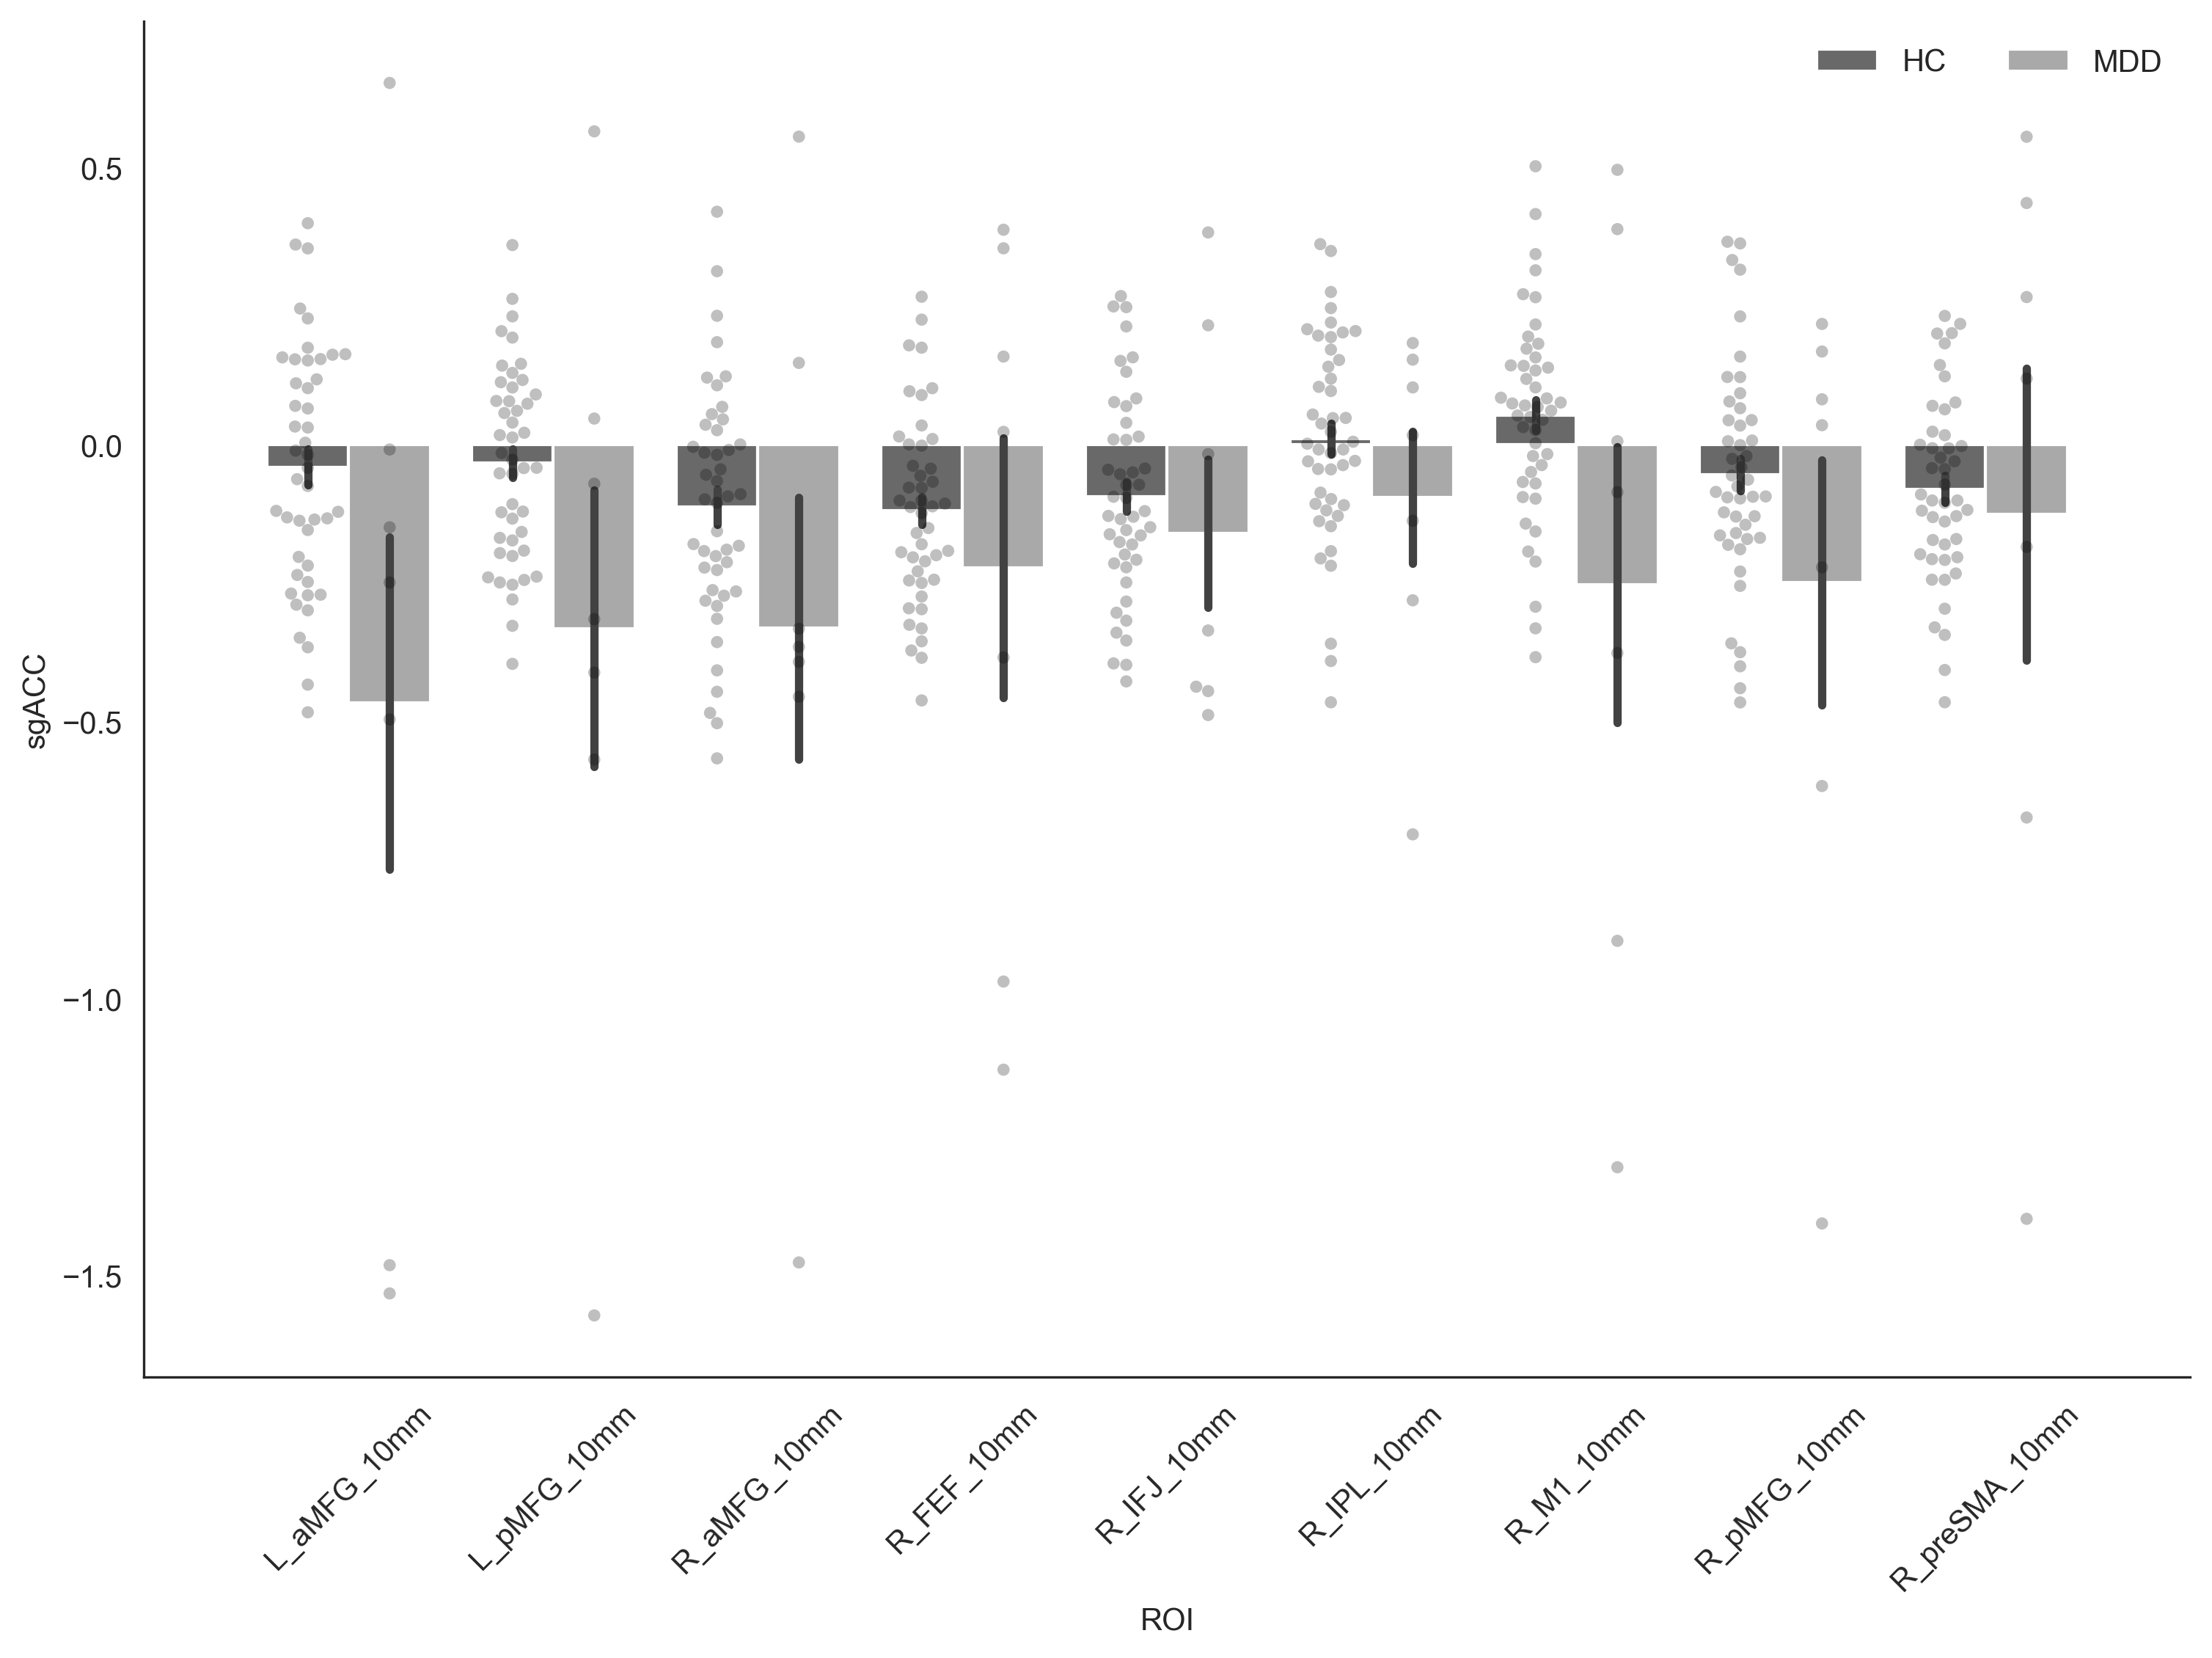

In [8]:
sns.set_style(style='white') 

# 6mm mask:
mask = '_10mm-'
seed = 'sgACC'

plot_x_order = [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]
cols_select = ["subject_id", "group"] + plot_x_order
xtick_label = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars=["subject_id", "group"], 
                    value_vars=plot_x_order, 
                    var_name="ROI", 
                    value_name="tms_response")

fig = make_plot(data_plot, seed, xtick_label)


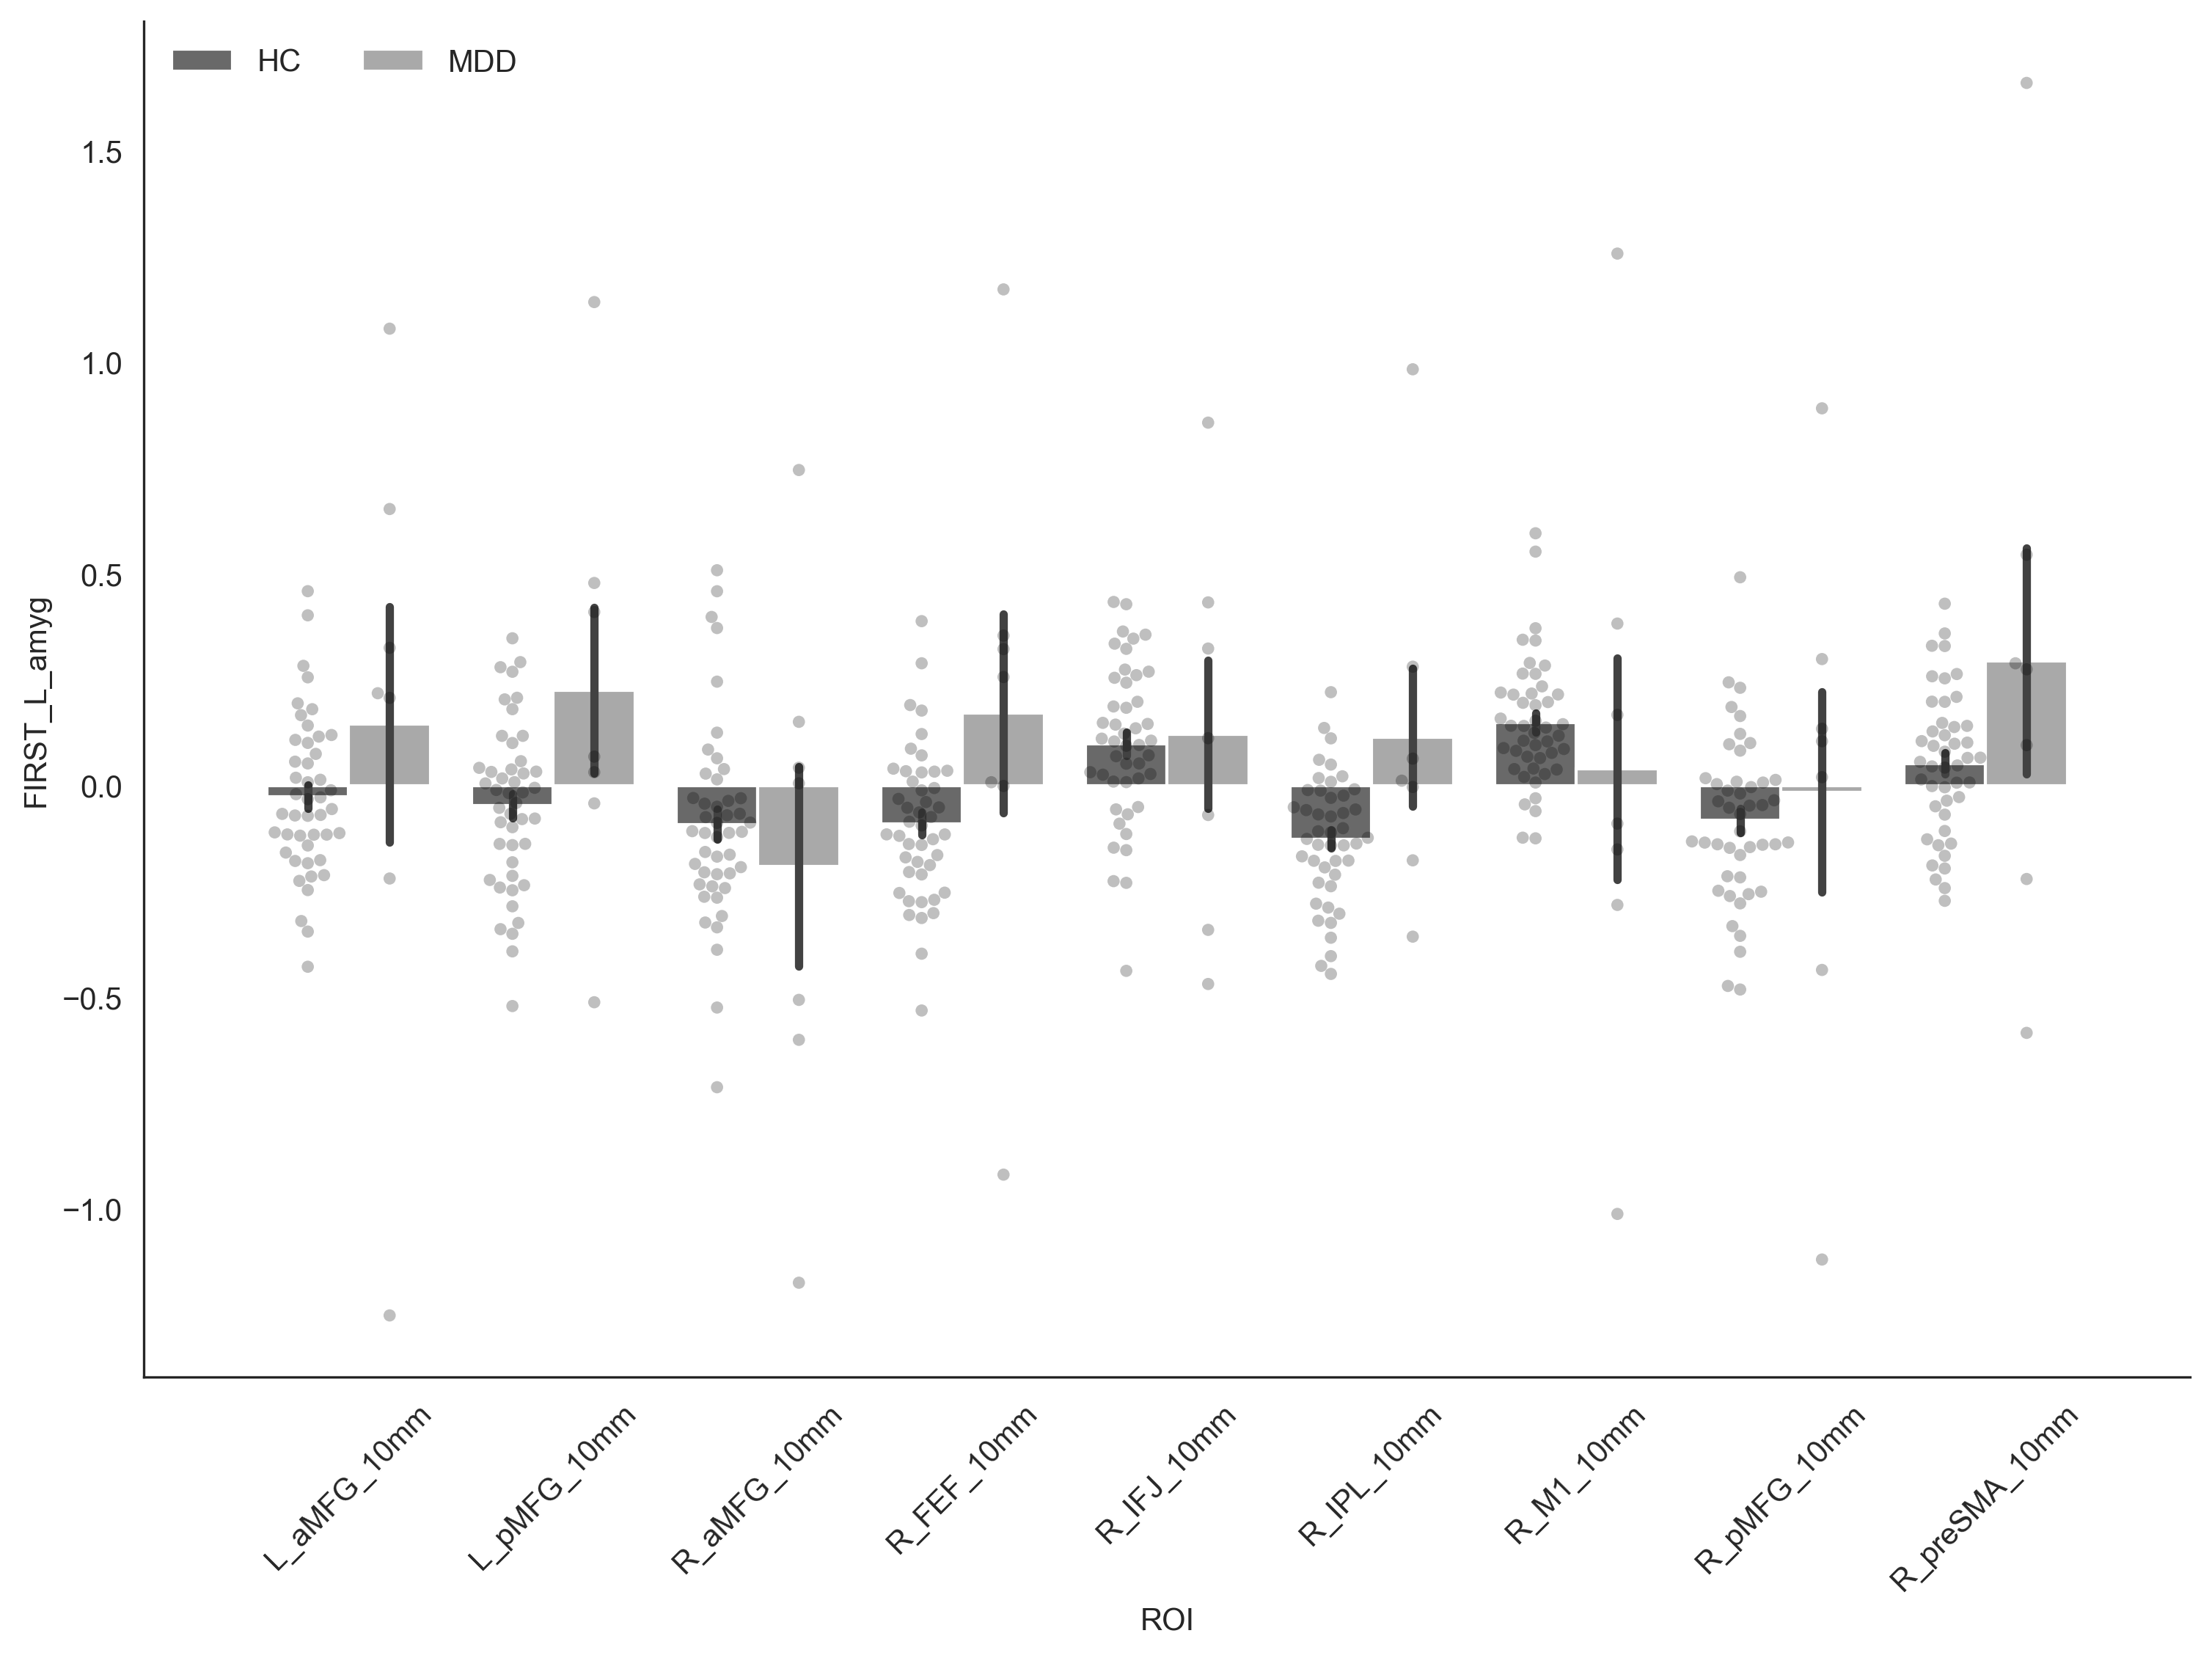

In [9]:
sns.set_style(style='white') 

# mask:
mask = '_10mm-'
seed = 'FIRST_L_amyg'

plot_x_order = [x for x in df_connectivity.columns if re.search(mask, x) and re.search(seed, x)]
cols_select  = ["subject_id", "group"] + plot_x_order
xtick_label  = [x.split('-')[0] for x in plot_x_order]

data_plot = pd.melt(df_connectivity[cols_select], 
                    id_vars    = ["subject_id", "group"], 
                    value_vars = plot_x_order, 
                    var_name   = "ROI", 
                    value_name = "tms_response")

fig = make_plot(data_plot, seed, xtick_label)


In [135]:
df_connectivity = pd.read_csv('out03_functional_connectivity_z.csv', )

# add mean response of amygdala (of current resting state data) to dataframe:
# roi_name = ["FIRST_B_amyg_small", "FIRST_L_amyg_small", "FIRST_R_amyg_small"]
# roi_index= [0, 1, 2]

# for idx, name in zip(roi_index, roi_name):
#     mean_response = []
#     for i, f in enumerate(df_connectivity['files_target']):
#         df2 = pd.read_csv(files_target[0], sep = '\t')
#         df2.pop(df2.columns[-1])
#         mean_response.append(df2.iloc[i,:].mean())
        
#     df_connectivity[name] = mean_response
    
    
# add tms induced responsed in amygdala (of tms session) to dataframe:

col = [
#     "FSL_R_Amy_thr40",
#     "ROI_R_Amy_Com_MNI",
    "FIRST_R_amyg_small",
#     "ROI_B_Amy_Com_MNI",
#     "FSL_L_Amy_thr40",
    "FIRST_B_amyg_small",
#     "FSL_B_Amy_thr40",
#     "ROI_L_Amy_Com_MNI",
    "FIRST_L_amyg_small",
    "sgACC_6_16_-10_10mm",
]

### select response data set:
# tms_response_hc = pd.read_csv("out02_img_file_info_nthc_tms_response.csv")
# tms_response_hc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore.csv')
tms_response_hc = pd.read_csv('out02_img_file_info_nthc_tms_response_zscore_gm.3.csv')

tms_response_mdd = pd.read_csv("out02_img_file_info_mdd_tms_response.csv")

tms_response = pd.concat([tms_response_hc, tms_response_mdd], axis = 0, keys = ['HC', 'MDD'])
# tms_response.reset_index(level = 0, inplace = True, names = 'group')
tms_response.reset_index(level = 0, inplace = True)
tms_response.rename(columns = {'level_0': 'group'}, inplace = True)
tms_response = tms_response[['subject_id', 'site'] + col]

df_connectivity_merge = df_connectivity.merge(tms_response, on = 'subject_id', how = 'inner')
df_connectivity_merge


,subject_id,group,L_aMFG_10-6mm-FIRST_B_amyg,L_aMFG_10-6mm-FIRST_L_amyg,L_aMFG_10-6mm-FIRST_R_amyg,L_aMFG_10-6mm-FSL_B_Amy,L_aMFG_10-6mm-FSL_L_Amy,L_aMFG_10-6mm-FSL_R_Amy,L_aMFG_10-6mm-ROI_B_Amy_Com,L_aMFG_10-6mm-ROI_L_Amy_Com,...,R_preSMA_6mm-FSL_R_Amy,R_preSMA_6mm-ROI_B_Amy_Com,R_preSMA_6mm-ROI_L_Amy_Com,R_preSMA_6mm-ROI_R_Amy_Com,R_preSMA_6mm-sgACC_6_16_-10,site,FIRST_R_amyg_small,FIRST_B_amyg_small,FIRST_L_amyg_small,sgACC_6_16_-10_10mm
0,3006,NTS,0.476364,0.341164,0.446476,0.482385,0.346468,0.462935,0.491339,0.395224,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,L_pMFG,0.245721,0.345136,0.454776,-0.270959
1,3006,NTS,0.476364,0.341164,0.446476,0.482385,0.346468,0.462935,0.491339,0.395224,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,L_aMFG,-0.648229,-0.397126,-0.120195,0.462169
2,3006,NTS,0.476364,0.341164,0.446476,0.482385,0.346468,0.462935,0.491339,0.395224,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,R_M1,-0.524258,-0.246509,0.059809,-0.209595
3,3006,NTS,0.476364,0.341164,0.446476,0.482385,0.346468,0.462935,0.491339,0.395224,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,R_pMFG,-0.198388,-0.134283,-0.063584,-0.059858
4,3006,NTS,0.476364,0.341164,0.446476,0.482385,0.346468,0.462935,0.491339,0.395224,...,-0.098079,0.021576,0.106874,-0.062840,0.446630,R_aMFG,-0.833138,-0.558441,-0.255490,-0.530966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1108,NTHC,0.407343,0.462061,0.339472,0.400213,0.456509,0.338431,0.417353,0.428037,...,0.083017,0.105550,0.102546,0.098578,0.126832,R_aMFG,-0.694005,-0.638723,-0.577755,-0.011167
249,1108,NTHC,0.407343,0.462061,0.339472,0.400213,0.456509,0.338431,0.417353,0.428037,...,0.083017,0.105550,0.102546,0.098578,0.126832,R_pMFG,0.257531,0.169372,0.072145,-0.456498
250,1108,NTHC,0.407343,0.462061,0.339472,0.400213,0.456509,0.338431,0.417353,0.428037,...,0.083017,0.105550,0.102546,0.098578,0.126832,R_M1,-0.002103,-0.043553,-0.089267,0.087272
251,1108,NTHC,0.407343,0.462061,0.339472,0.400213,0.456509,0.338431,0.417353,0.428037,...,0.083017,0.105550,0.102546,0.098578,0.126832,L_aMFG,-0.664084,-0.899849,-1.159864,0.227694


In [136]:
# correlation between mean response at amygdala and FC with stimulate site:

# roi_name = ["FIRST_B_amyg", "FIRST_L_amyg", "FIRST_R_amyg"]

# roi pattern to search for columns in FC.
roi_name = ["FIRST_L_amyg", "FIRST_R_amyg", "sgACC"]

# col name for tms induced response
roi_col_name = ["FIRST_L_amyg_small", "FIRST_R_amyg_small", "sgACC_6_16_-10_10mm"]

mask_size = '_14mm-'

plot_data_all = []
for roi, roi_col in zip(roi_name, roi_col_name):
    seed_roi = [x for x in df_connectivity_merge.columns if re.search(mask_size, x) and re.search(roi, x)]
    plot_data = []
    for seed in seed_roi:
        plot_data_i = df_connectivity_merge[['subject_id', 'group', 'site', roi_col, seed]]
        plot_data_i.columns = ['subject_id', 'group', 'site', 'mean_response', 'connectivity']
        plot_data.append(plot_data_i)
        
    plot_data = pd.concat(plot_data, axis = 0, keys = seed_roi)
    plot_data_all.append(plot_data)
    
plot_data_all = pd.concat(plot_data_all, axis = 0, keys = roi_name)
plot_data_all.reset_index(level = [0, 1], inplace = True)
plot_data_all.columns.values[:2] = ['seed', 'target']

plot_data_all['seed'].replace({'FIRST_': ''}, regex=True, inplace = True)
plot_data_all['seed'].replace({'_small': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + 'FIRST_.*': ''}, regex=True, inplace = True)
plot_data_all['target'].replace({mask_size + 'sgACC_.*': ''}, regex=True, inplace = True)

plot_data_all = plot_data_all.loc[plot_data_all['target'] == plot_data_all['site'], :]

plot_data_all = plot_data_all.loc[plot_data_all['group'] == "NTHC", :]

### remove outliers:
m   = plot_data_all['mean_response'].mean()
std = plot_data_all['mean_response'].std()

lower, upper = m - 2.5 * std, m + 3 * std

print(plot_data_all.loc[(plot_data_all['mean_response']<=lower) | 
                        (plot_data_all['mean_response']>=upper), :])
plot_data_all = plot_data_all.loc[(plot_data_all['mean_response']>lower) & 
                                  (plot_data_all['mean_response']<upper), :]


plot_data_all = plot_data_all.loc[plot_data_all['target'].isin(['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']), :]

# plot_data_all['target'] = pd.Categorical(
#     plot_data_all['target'], categories=['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1'], ordered=True)

# sorted(plot_data_all['target'].unique())
plot_data_all.head()

# plot_data_all.to_csv('out03_plot_data_tms_induced_response_FC.csv')

       seed  target  subject_id group    site  mean_response  connectivity
126  L_amyg  L_aMFG        1040  NTHC  L_aMFG      -2.260798     -0.211743
154  L_amyg  L_aMFG        1052  NTHC  L_aMFG      -1.908147     -0.175459
168  L_amyg  L_aMFG        1056  NTHC  L_aMFG      -2.239470      0.041223
245  R_amyg  R_aMFG        1107  NTHC  R_aMFG      -2.506834      0.179810
35   R_amyg    R_M1        1001  NTHC    R_M1      -2.072100      0.199733
139  R_amyg  R_pMFG        1047  NTHC  R_pMFG      -1.855539     -0.126692
199  R_amyg  R_pMFG        1068  NTHC  R_pMFG       2.242837     -0.061686
215   sgACC  L_aMFG        1097  NTHC  L_aMFG      -1.986308     -0.229222


,seed,target,subject_id,group,site,mean_response,connectivity
39,L_amyg,L_aMFG,1003,NTHC,L_aMFG,1.827142,0.357534
47,L_amyg,L_aMFG,1009,NTHC,L_aMFG,-0.909557,-0.185249
51,L_amyg,L_aMFG,1015,NTHC,L_aMFG,-1.076714,-0.165243
57,L_amyg,L_aMFG,1016,NTHC,L_aMFG,0.443483,-0.000251
60,L_amyg,L_aMFG,1019,NTHC,L_aMFG,0.271721,0.186525


In [137]:
# scatter plot:

from scipy.stats import pearsonr
# we don't need partial correlation this could be eliminated to make the code cleaner
from pingouin import partial_corr
import matplotlib.lines as mlines
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(rc={'figure.figsize':(4.2 * 9, 4.2 * 3)}, font_scale = 1)
sns.set_style("ticks")

# plot_x_order = [x for x in df_connectivity.columns if re.search('_10mm-', x) and re.search("FIRST_L_amyg_small", x)]
colors = [
    mcolors.CSS4_COLORS['dimgray'], 
#    mcolors.CSS4_COLORS['darkgrey'],
    mcolors.CSS4_COLORS['darkgrey'],
]

colors = sns.color_palette("husl", 5).as_hex()
colors = [colors[0], colors[2]]

scatter_para = {'alpha': 0.7, 's': 30, 'linewidth': 0.2}

def scatter_plot(plot_data, row_order):
    
    g = sns.lmplot(x           = "connectivity",
                   y           = 'mean_response', 
                   #hue         = 'group', 
                   #hue_order   = ['NTHC', 'NTS'],
                   #palette     = colors, 
                   #markers     = ['o', 'v',],
                   row         = 'target', 
                   row_order   = row_order,
                   col         = 'seed', 
                   data        = plot_data, 
                   fit_reg     = True, 
                   facet_kws   = {'sharex': False, 'sharey': True},
                   scatter_kws = scatter_para, 
                   line_kws    = {'lw': 2},
                   x_jitter    = 0, 
                   order       = 1,
                   height      = 3.27, 
                   aspect      = 1, 
                   robust      = False,
                   legend      = False)
    
    # compute R squared for each group and cluster:
    column_title = plot_data['seed'].unique()
    
    # use row_order to make sure label and data match correctly:
    #row_title = sorted(plot_data['target'].unique())
    row_title = row_order 
        
    # add legend last column of each row:
#     for row in range(len(row_title)):
#         ## create custom legend for regplot:
#         hc_line = mlines.Line2D([], [], color=colors[0], marker='o',linewidth=4,
#                           markersize=8, label='HC')
#         dis_line = mlines.Line2D([], [], color=colors[1], marker='v', linewidth=4, #lineStyle = 'dashed',
#                                   markersize=8, label='MDD')

#         g.axes[row, -1].legend(handles=[hc_line, dis_line], 
#                                loc = 'lower right',frameon=False)
#         plt.setp(g.axes[row, -1].get_legend().get_texts(), fontsize='12')
    
#     x_pos = [18, 12, 71, 48, 7, -5]
#     x_lim = [[16, 62], [11.5, 18.5], [69, 102], [46, 85], [6, 25], [-10, 100]]
    
    # add annotation (correlation value) and some adjustments to the axes:
    for col in range(len(column_title)):
        for row in range(len(row_title)):
            
            # HC:
            x = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              (plot_data['group']=='NTHC'), 
                              'mean_response'].values
            
            y = plot_data.loc[(plot_data['target']==row_title[row])&
                              (plot_data['seed']==column_title[col])&
                              (plot_data['group']=='NTHC'), 
                              'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             print(any(idx_nan))
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
            r, p = pearsonr(x, y)
#             label1 = "HC: $r$ = %.3f, $p$ = %.3f" % (r, p)
            label1 = "$r$ = %.3f, $p$ = %.3f" % (r, p)
            if p < .05:
                label1 += '*'
             
            # MDD:
#             x = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'mean_response'].values
            
#             y = plot_data.loc[(plot_data['target']==row_title[row])&
#                               (plot_data['seed']==column_title[col])&
#                               (plot_data['group']=='NTS'), 
#                               'connectivity'].values
                        
#             idx_nan = np.isnan(x) | np.isnan(y)
#             r, p = pearsonr(x[~idx_nan], y[~idx_nan])
#             label2 = "MDD: $r$ = %.3f, $p$ = %.3f" % (r, p)
#             if p < .05:
#                 label2 += '*'
                     
    
            g.axes[row, col].set_xlim([-.8, .6])
            xticks = np.arange(-.8, .8, .2)
            g.axes[row, col].set_xticks(xticks)
        
            xlim = g.axes[row, col].get_xlim()
            label_x = xlim[0] + (xlim[1] - xlim[0]) * .1
        
            ylim = g.axes[row, col].get_ylim()
            label_y1 = ylim[1] - (ylim[1] - ylim[0]) * .1
            
            g.axes[row, col].text(label_x, label_y1, label1, fontsize = 13)
#             g.axes[row, col].text(label_x[col], label_y2, label2, fontsize = 13)
        
            # Hide the right and top spines
            g.axes[row, col].spines['right'].set_visible(False)
            g.axes[row, col].spines['top'].set_visible(False)
            
    
    # change x and y label:
    for row in range(len(row_title)): 
        g.axes[row, 0].set(ylabel='TMS induced response')
            
    return g



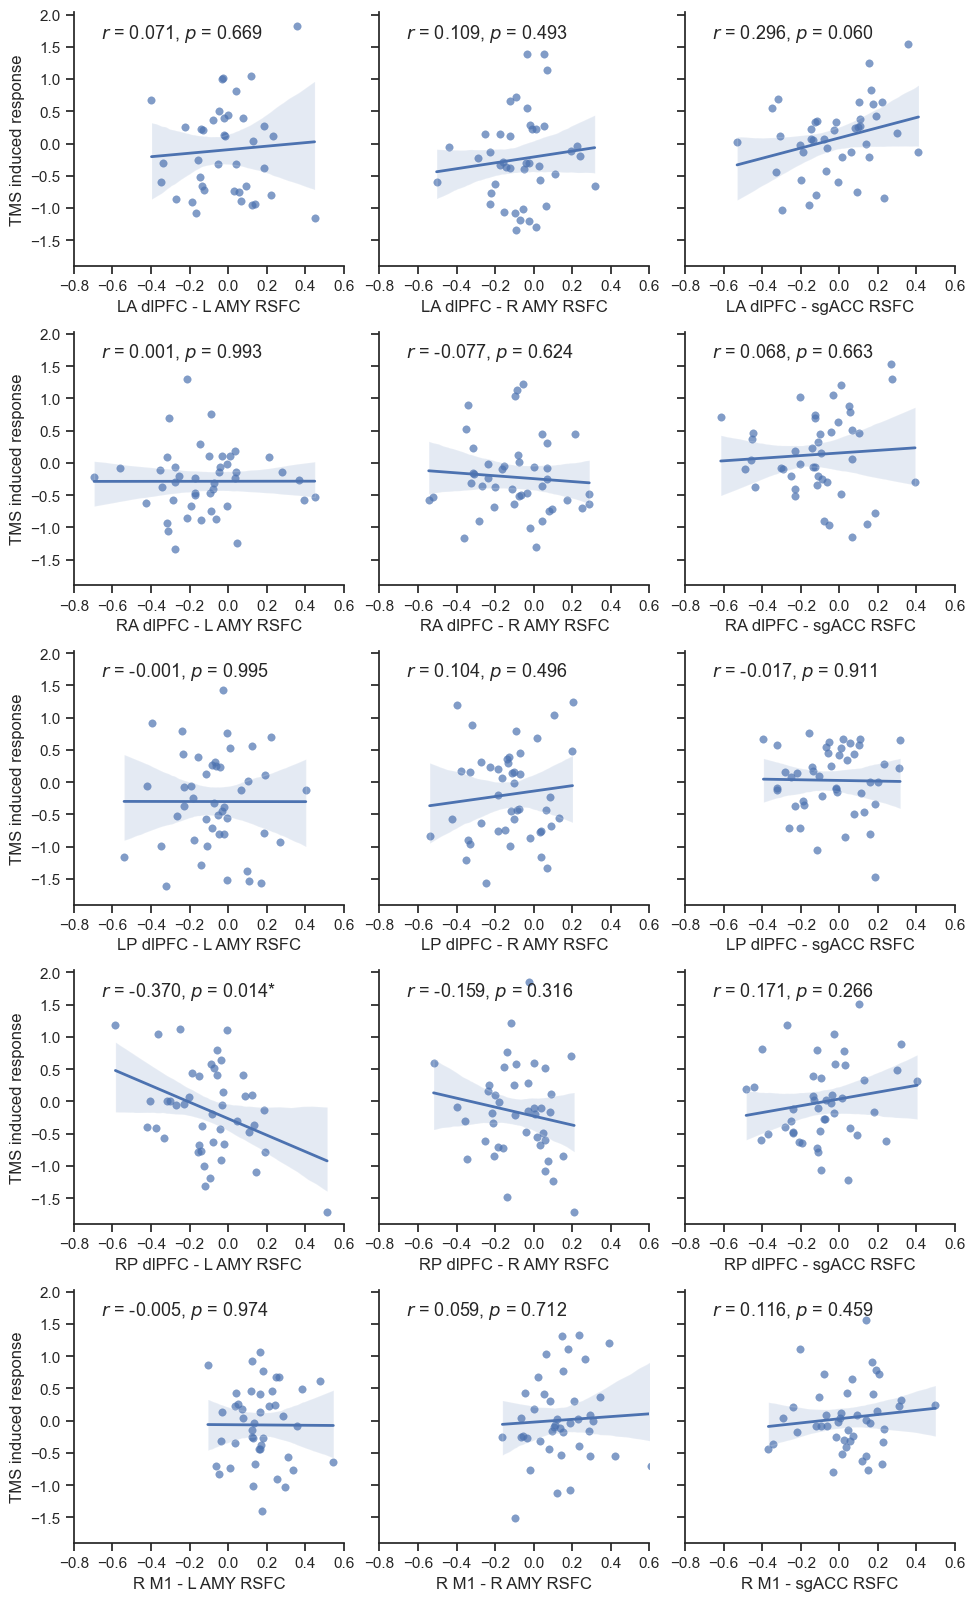

In [138]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']
fig = scatter_plot(plot_data_all, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]

for row in range(len(x_label_list)):    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')


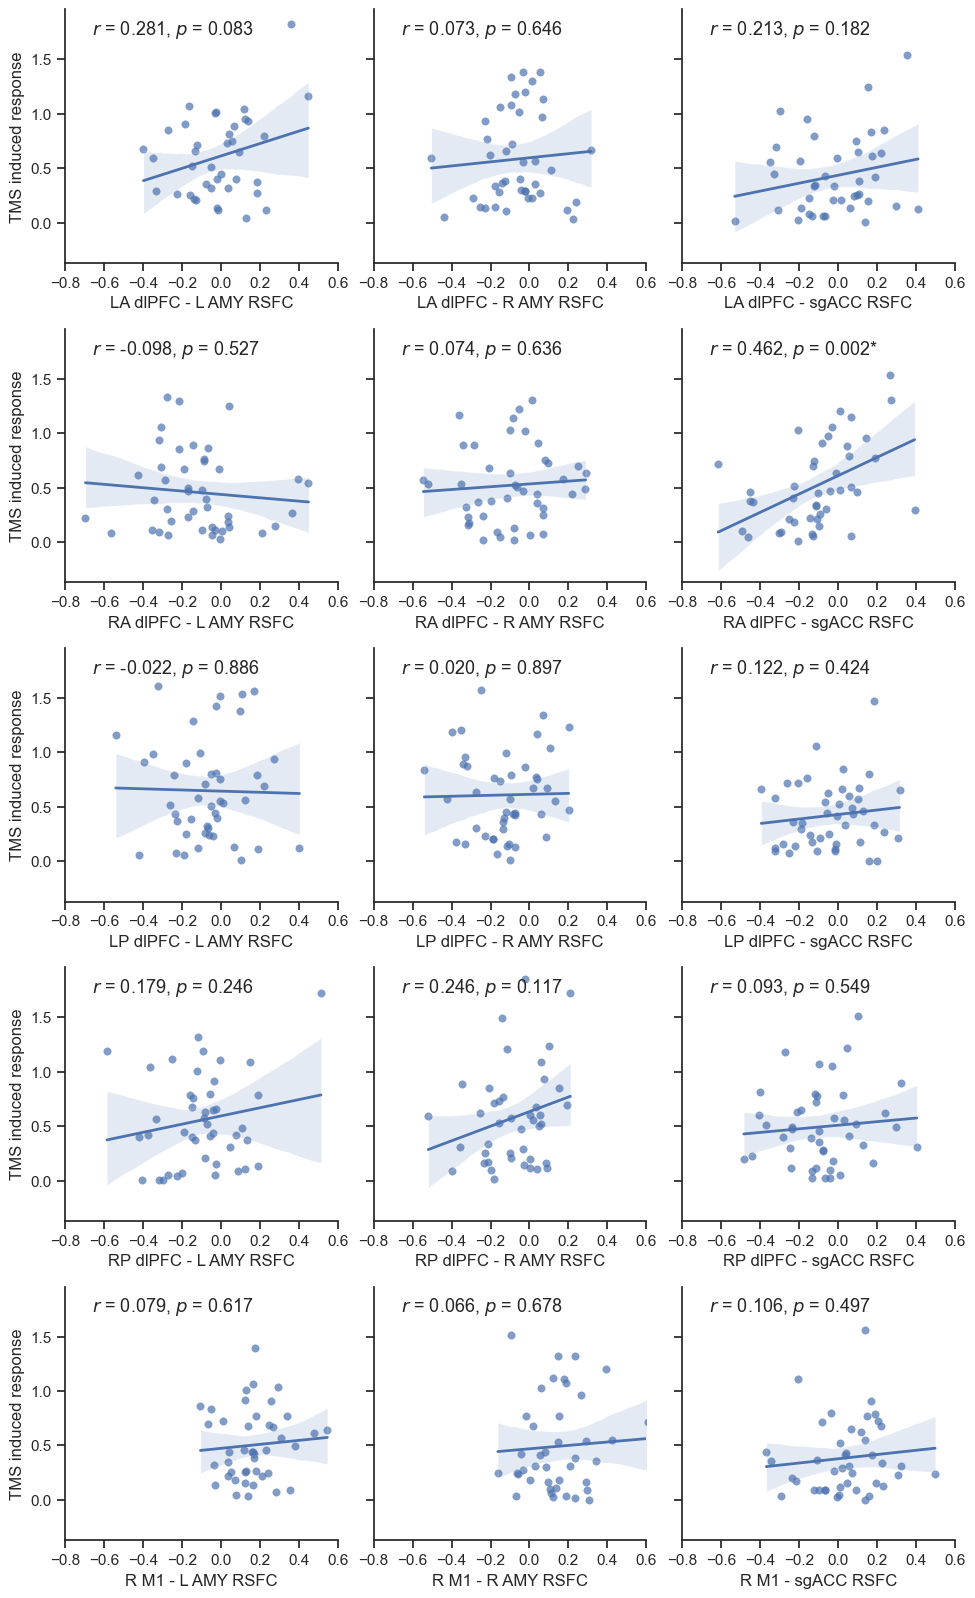

In [139]:
# sns.set_style(style='white')
sns.set_style("ticks")

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_abs = plot_data_all.copy()
plot_data_all_abs['mean_response'] = abs(plot_data_all['mean_response'])
fig = scatter_plot(plot_data_all_abs, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')


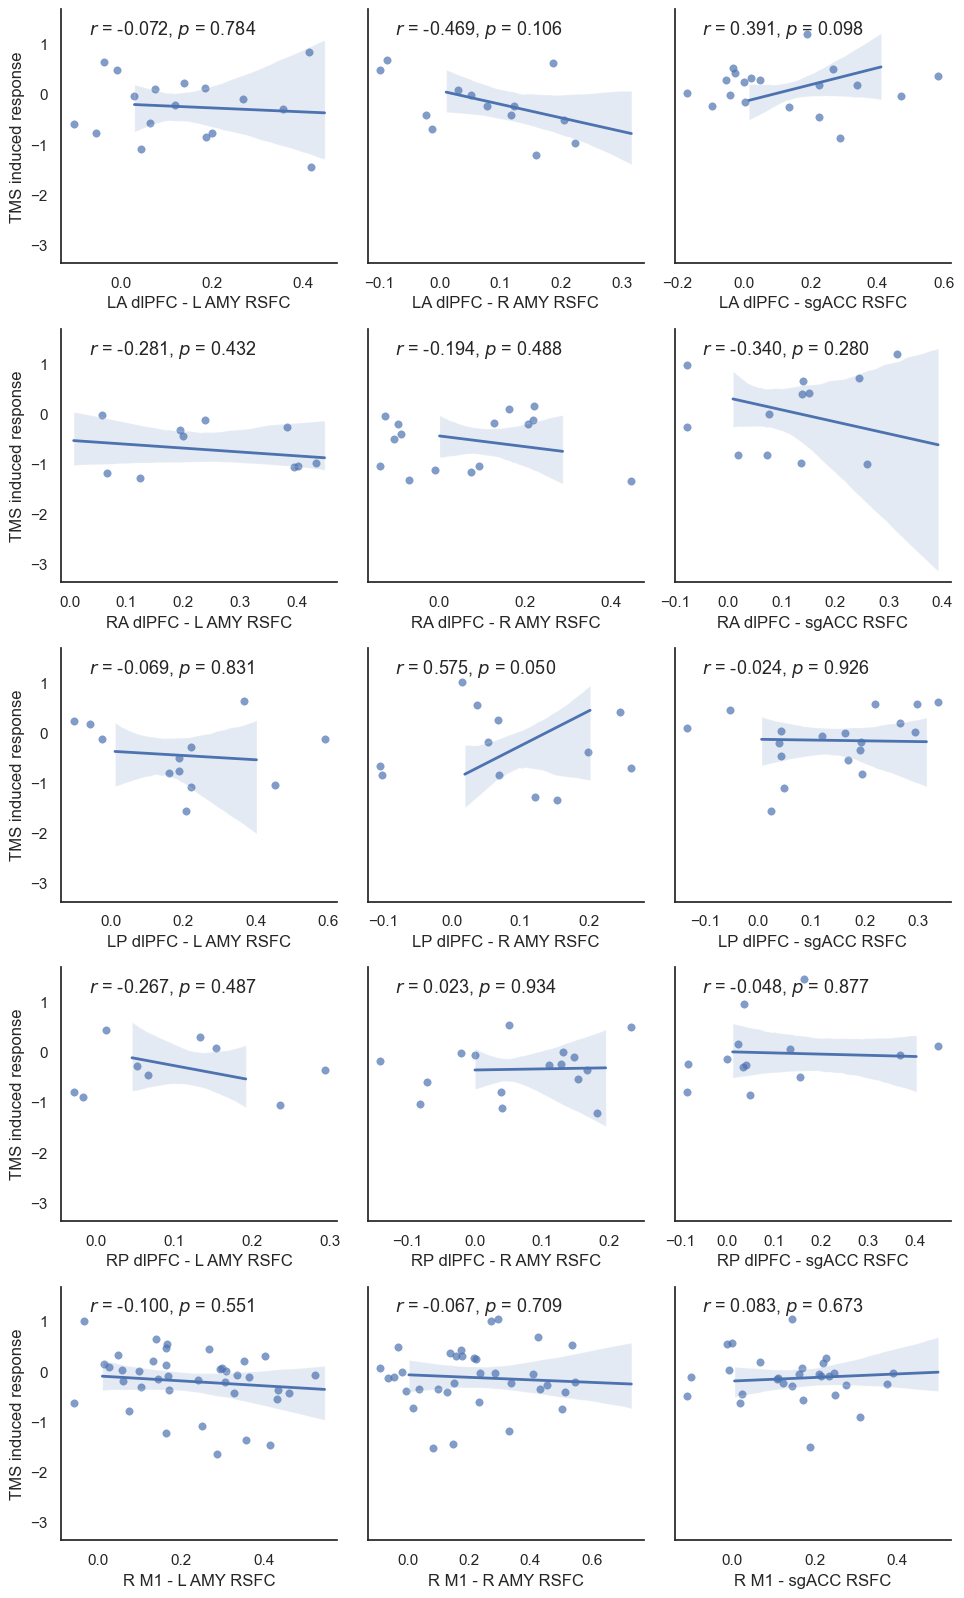

In [43]:
sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_pos = plot_data_all.loc[plot_data_all['connectivity'] >=0, :]
fig = scatter_plot(plot_data_all_pos, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

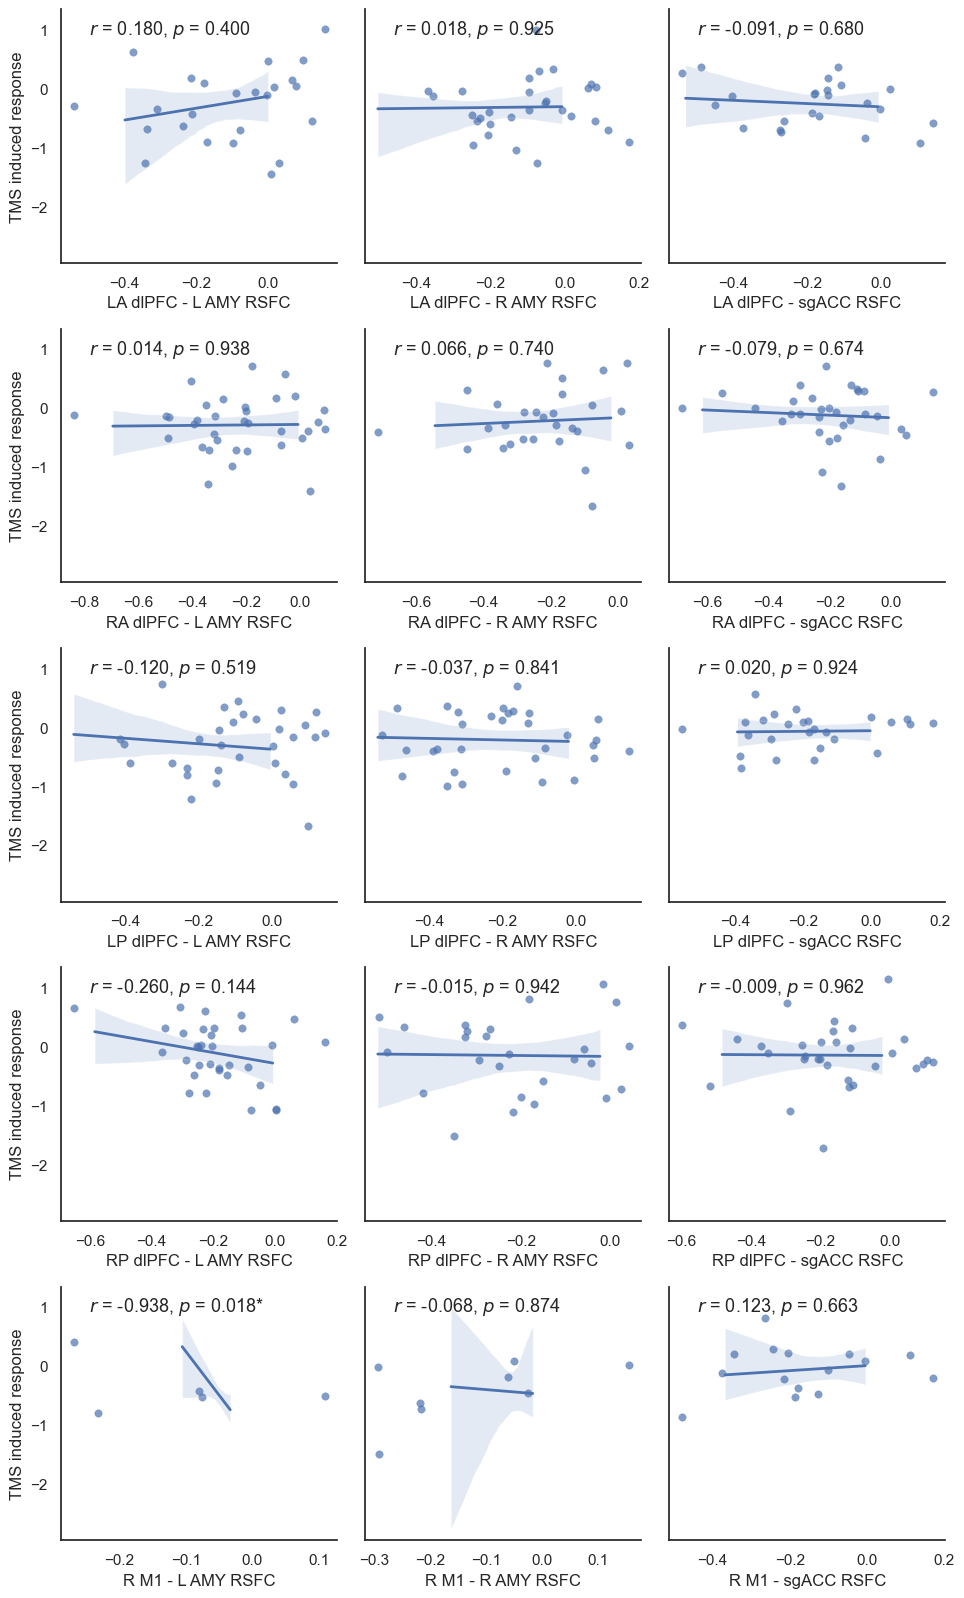

In [44]:
sns.set_style(style='white')

row_order = ['L_aMFG', 'R_aMFG', 'L_pMFG', 'R_pMFG', 'R_M1']

plot_data_all_neg = plot_data_all.loc[plot_data_all['connectivity'] < 0, :]
fig = scatter_plot(plot_data_all_neg, row_order)

x_label_list = ["LA dlPFC", "RA dlPFC", "LP dlPFC", "RP dlPFC", "R M1"]
for row in range(len(x_label_list)):
    
    fig.axes[row, 0].set(xlabel = x_label_list[row] + ' - L AMY RSFC', title = '')
    fig.axes[row, 1].set(xlabel = x_label_list[row] + ' - R AMY RSFC', title = '')
    fig.axes[row, 2].set(xlabel = x_label_list[row] + ' - sgACC RSFC', title = '')

[Text(0.5, 33.078125, 'RA dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

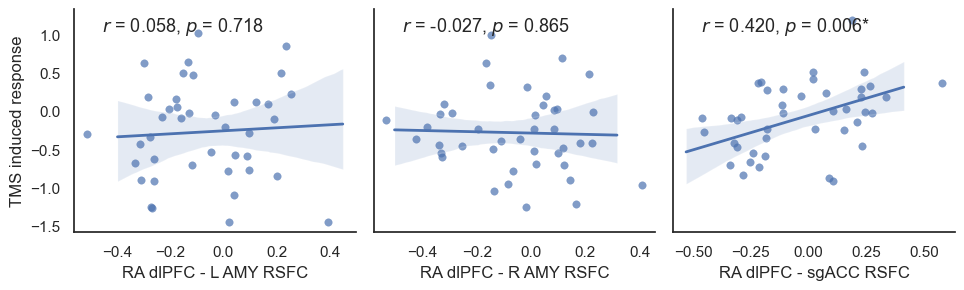

In [41]:
sns.set_style(style='white')

fig = scatter_plot(plot_data_all.loc[plot_data_all['target'] == 'L_aMFG',:], ['L_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'RA dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

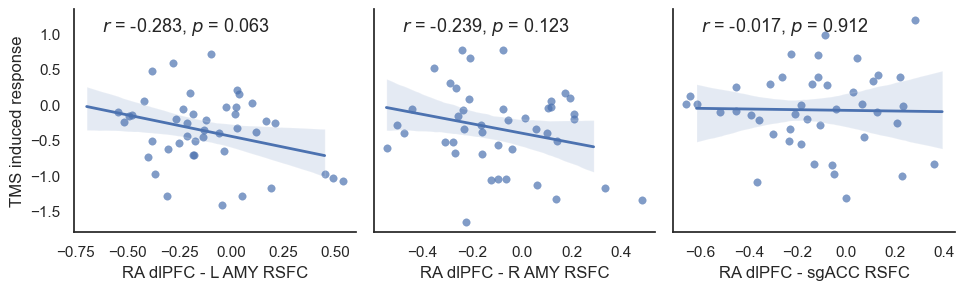

In [40]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_aMFG',:], ['R_aMFG'])

fig.axes[0, 0].set(xlabel = 'RA dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RA dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RA dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'RP dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

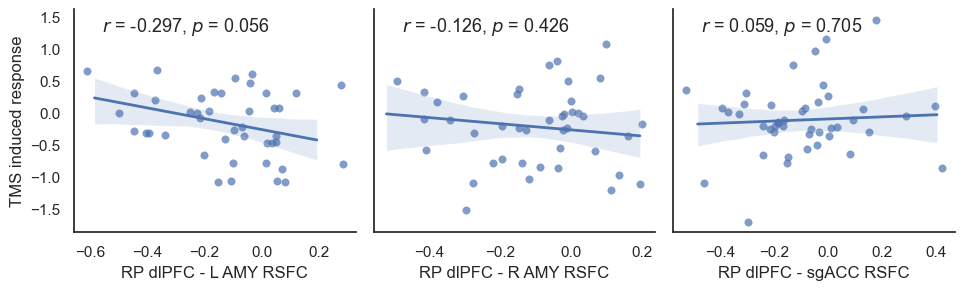

In [38]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'R_pMFG',:], ['R_pMFG'])

fig.axes[0, 0].set(xlabel = 'RP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'RP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'RP dlPFC - sgACC RSFC', title = '')


[Text(0.5, 33.078125, 'LP dlPFC - sgACC RSFC'), Text(0.5, 1.0, '')]

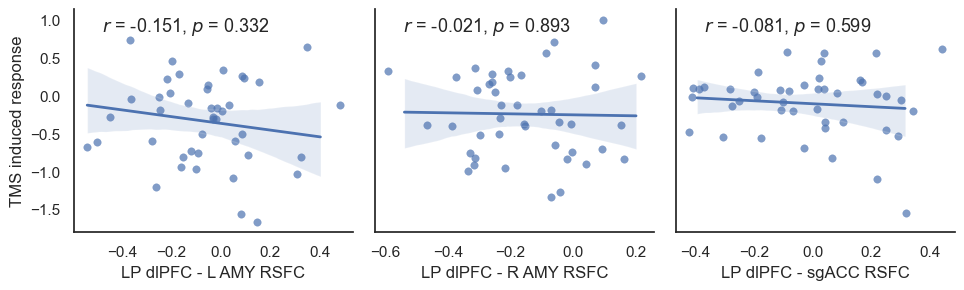

In [42]:
sns.set_style(style='white')
fig = scatter_plot(plot_data_all.loc[plot_data_all['site'] == 'L_pMFG',:], ['L_pMFG'])

fig.axes[0, 0].set(xlabel = 'LP dlPFC - L AMY RSFC', title = '')
fig.axes[0, 1].set(xlabel = 'LP dlPFC - R AMY RSFC', title = '')
fig.axes[0, 2].set(xlabel = 'LP dlPFC - sgACC RSFC', title = '')
